<a href="https://colab.research.google.com/github/narsym/deep-learning-with-pytorch/blob/master/pytorch_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing pytorch

In [0]:
import torch

Creating scalar and checking size

In [0]:
x = torch.rand(10)

In [3]:
x.size()

torch.Size([10])

creating tensor of 1D

In [0]:
temp = torch.FloatTensor([1,2,3,4,5])

In [5]:
temp

tensor([1., 2., 3., 4., 5.])

experimenting with tensor of 2D

In [0]:
from sklearn.datasets import load_boston
boston = load_boston()
boston_tensor = torch.from_numpy(boston.data)

In [7]:
boston_tensor.size()

torch.Size([506, 13])

In [8]:
boston_tensor[:2]

tensor([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01, 6.5750e+00,
         6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02, 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01, 6.4210e+00,
         7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02, 1.7800e+01, 3.9690e+02,
         9.1400e+00]], dtype=torch.float64)

Creating tensor of 3D using images

torch.Size([224, 224, 3])

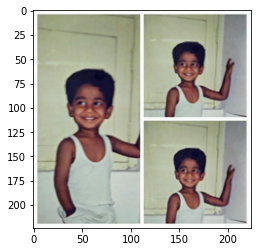

In [21]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
panda = np.array(Image.open('chetan.jfif').resize((224,224)))
panda_tensor = torch.from_numpy(panda)
plt.imshow(panda)
panda_tensor.size()

In [22]:
sales = torch.FloatTensor([1,2,3,4,5,6,7,8])
sales[:5]

tensor([1., 2., 3., 4., 5.])

In [23]:
sales[:-5]

tensor([1., 2., 3.])

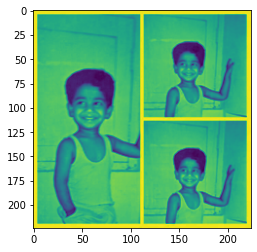

In [24]:
plt.imshow(panda_tensor[:,:,0].numpy())

slicing tensor

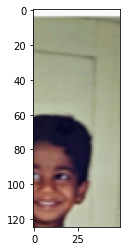

In [25]:
plt.imshow(panda_tensor[:125,50:100,:].numpy())

In [26]:
sales = torch.eye(3,3)
sales[0,1]

tensor(0.)

Images and video are 4D and 5D tensors

In [0]:
#batch of images is 4d tensor(64,224,224,3)

In [0]:
#video data is 5d tensor, 30 second video containing images in 4d tensor and many 30 sec second videos stacked together is 5d tensor

simple arithematic on tensors

In [29]:
a = torch.rand(2,2)
b = torch.rand(2,2)
c = a + b
d = torch.add(a,b)
print(c)
print(d)

tensor([[0.3153, 1.0445],
        [0.9137, 1.1077]])
tensor([[0.3153, 1.0445],
        [0.9137, 1.1077]])


In [30]:
print(a * b)
print(a.mul(b))

tensor([[0.0205, 0.2236],
        [0.1917, 0.3013]])
tensor([[0.0205, 0.2236],
        [0.1917, 0.3013]])


for gpu support tensors use cuda() method

In [0]:
a = a.cuda()
b = b.cuda()
a * b

Variable for tensors and its properties

In [0]:
x = torch.autograd.Variable(torch.ones(2,2),requires_grad = True)
y = x.mean()
y.backward()

checking gradient

In [34]:
x.grad

tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])

In [0]:
x.grad_fn

checking data 

In [36]:
x.data

tensor([[1., 1.],
        [1., 1.]])

checking gradient function for y

In [37]:
y.grad_fn

Creating data function for neural network

In [0]:
from torch.autograd import Variable
#creating data
def get_data():
  X_train = np.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.176,7.042,10.791,5.313,7.997,5.654,9.27,3.1])
  y_train = np.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.336,2.596,2.53,1.221,2.827,3.465,1.65,2.904,2.42,2.94,1.3])
  dtype = torch.FloatTensor
  X = Variable(torch.from_numpy(X_train).type(dtype),requires_grad = False).view(17,1)
  y = Variable(torch.from_numpy(y_train).type(dtype),requires_grad = False)
  return X,y

creating get weights fucntion

In [0]:
#learnable parameters
def get_weights():
  w = Variable(torch.randn(1),requires_grad = True)
  b = Variable(torch.randn(1),requires_grad = True)
  return w,b

creating simple neural network

In [0]:
#simple network
def simple_network(x):
  y_pred = torch.matmul(x,w) + b
  return y_pred

creating loss function

In [0]:
#loss function
def loss_fn(y,y_pred):
  loss = (y_pred - y).pow(2).sum()
  for param in [w,b]:
    if not param.grad is None:
      param.grad.data.zero_()
  loss.backward()
  return loss.item()

creating optimizing function

In [0]:
#optimize the network
def optimize(learning_rate):
  w.data -= learning_rate * w.grad.data
  b.data -= learning_rate * b.grad.data 

deriving class for dataset

In [0]:
#dataset class
from glob import glob
from torch.utils.data import Dataset
from PIL import Image
import numpy as np
class DogsAndCatsDataset(Dataset):
  def __init__(self,root_dir,size = (224,224)):
    self.files = glob(root_dir)
    self.size = size
  def __len__(self):
    return len(self.files)
  def __getitem__(self,idx):
    img = np.asarray(Image.open(self.files[idx]).resize(self.size))
    label = self.files[idx].split('/')[-2]
    return img,label


sample code to read data from the files

from glob import glob 

sample_data = './sample_data/' 

glob(sample_data)

creating object and reading files from the folder

In [0]:
dogsdataset = DogsAndCatsDataset('./sample_data')
for image,label in dogsdataset:
  #apply your DL on the dataset
  pass

example for using dataloader class

In [0]:
from torch.utils.data import DataLoader
dataloader = DataLoader(dogsdataset,batch_size = 32,num_workers = 2)
for img,labels in dataloader:
  #apply your DL on the dataset
  pass

Implementing complete neural network

In [53]:
X,y = get_data()
w,b = get_weights()
for i in range(500):
  y_pred = simple_network(X)
  loss = loss_fn(y_pred,y)
  if i % 50 == 0:
    print(loss)
  optimize(0.001)

1327.345947265625
2.880486249923706
2.7890994548797607
2.728644371032715
2.688652515411377
2.662196636199951
2.64469575881958
2.633117198944092
2.6254591941833496
2.6203925609588623
